<a href="https://colab.research.google.com/github/hoaint25/IBM_Data_Analyst/blob/master/Waffle_Charts_Word_Clouds_and_Regression_Plots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/labs/Module%204/logo.png" width="300" alt="cognitiveclass.ai logo"  />
</center>

# Waffle Charts, Word Clouds, and Regression Plots

Estimated time needed: **30** minutes

## Objectives

After completing this lab you will be able to:

*   Create Word cloud and Waffle charts
*   Create regression plots with Seaborn library


## Table of Contents

<div class="alert alert-block alert-info" style="margin-top: 20px">

1.  [Exploring Datasets with *p*andas](#0)<br>
2.  [Downloading and Prepping Data](#2)<br>
3.  [Visualizing Data using Matplotlib](#4) <br>
4.  [Waffle Charts](#6) <br>
5.  [Word Clouds](#8) <br>
6.  [Regression Plots](#10) <br>

</div>


# Exploring Datasets with *pandas* and Matplotlib<a id="0"></a>

Toolkits: The course heavily relies on [*pandas*](http://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) and [*Numpy*](http://www.numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) for data wrangling, analysis, and visualization. The primary plotting library we will explore in the course is [Matplotlib](http://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01).

Dataset: Immigration to Canada from 1980 to 2013 - [International migration flows to and from selected countries - The 2015 revision](http://www.un.org/en/development/desa/population/migration/data/empirical2/migrationflows.shtml?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkDV0101ENSkillsNetwork20297740-2021-01-01) from United Nation's website

The dataset contains annual data on the flows of international migrants as recorded by the countries of destination. The data presents both inflows and outflows according to the place of birth, citizenship or place of previous / next residence both for foreigners and nationals. In this lab, we will focus on the Canadian Immigration data.


# Downloading and Prepping Data <a id="2"></a>
The first thing we'll do is install **openpyxl** (formerly **xlrd**), a module that *pandas* requires to read Excel files.


In [1]:
!mamba install openpyxl==3.0.9 -y

/bin/bash: mamba: command not found


In [2]:
#Import Primary Library
import numpy as np 
import pandas as pd
from PIL import Image #converting images into arrays

Download the Canadian Immigration dataset and read it into a *pandas* dataframe.


In [3]:
df_can = pd.read_excel(
    'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.xlsx',
    sheet_name='Canada by Citizenship',
    skiprows=range(20),
    skipfooter=2)

print('Data downloaded and read into a dataframe!')

Data downloaded and read into a dataframe!


Let's take a look at the first five items in our dataset


In [4]:
df_can.head()

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603
2,Immigrants,Foreigners,Algeria,903,Africa,912,Northern Africa,902,Developing regions,80,...,3616,3626,4807,3623,4005,5393,4752,4325,3774,4331
3,Immigrants,Foreigners,American Samoa,909,Oceania,957,Polynesia,902,Developing regions,0,...,0,0,1,0,0,0,0,0,0,0
4,Immigrants,Foreigners,Andorra,908,Europe,925,Southern Europe,901,Developed regions,0,...,0,0,1,1,0,0,0,0,1,1


In [5]:
#find out how many entries there are in our dataset
print(df_can.shape)

(195, 43)


Clean up data. We will make some modifications to the original dataset to make it easier to create our visualizations. Refer to *Introduction to Matplotlib and Line Plots* and *Area Plots, Histograms, and Bar Plots* for a detailed description of this preprocessing.


In [6]:
# clean up the dataset to remove unnecessary columns (eg. REG) 
df_can.drop(['AREA','REG','DEV','Type','Coverage'], axis = 1, inplace = True)

# let's rename the columns so that they make sense
df_can.rename (columns = {'OdName':'Country', 'AreaName':'Continent','RegName':'Region'}, inplace = True)

# for sake of consistency, let's also make all column labels of type string
df_can.columns = list(map(str, df_can.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df_can.set_index('Country', inplace = True)

# add total column
df_can['Total'] =  df_can.sum (axis = 1)

# years that we will be using in this lesson - useful for plotting later on
years = list(map(str, range(1980, 2014)))
print ('data dimensions:', df_can.shape)

data dimensions: (195, 38)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


# Visualizing Data using Matplotlib<a id="4"></a>
Import and setup `matplotlib`:


In [7]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches #using for Waffle charts 

#styling by gg-plot
mpl.style.use('ggplot')


# Waffle Charts <a id="6"></a>

A `waffle chart` is an interesting visualization that is normally created to display progress toward goals. It is commonly an effective option when you are trying to add interesting visualization features to a visual that consists mainly of cells, such as an Excel dashboard.

Let's revisit the previous case study about Denmark, Norway, and Sweden.


In [13]:
#create dataframe for these case study
df = df_can.loc[['Denmark','Norway','Sweden'],:]
df.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Denmark,Europe,Northern Europe,Developed regions,272,293,299,106,93,73,93,...,62,101,97,108,81,92,93,94,81,3901
Norway,Europe,Northern Europe,Developed regions,116,77,106,51,31,54,56,...,57,53,73,66,75,46,49,53,59,2327
Sweden,Europe,Northern Europe,Developed regions,281,308,222,176,128,158,187,...,205,139,193,165,167,159,134,140,140,5866


Unfortunately, unlike R, `waffle` charts are not built into any of the Python visualization libraries. Therefore, we will learn how to create them from scratch.

**Step 1.** The first step into creating a waffle chart is determing the proportion of each category with respect to the total.


In [20]:
#compute the proportion of each category with respect to the total 
total_values = df['Total'].sum()
category_proportion = df['Total']/total_values

#print out proportions
pd.DataFrame({"Category Proportion": category_proportion})

,Category Proportion
Country,
Denmark,0.322557
Norway,0.192409
Sweden,0.485034


**Step 2.** The second step is defining the overall size of the `waffle` chart.


In [18]:
width = 40 
height = 10

total_num_titles = width * height


**Step 3.** The third step is using the proportion of each category to determe it respective number of tiles


In [26]:
#compute the number of tiles for each category
tiles_per_category = (category_proportion * total_num_titles).round().astype(int)

#print out the number of titles per category
pd.DataFrame({'Number of titles':titles_per_category})

,Number of titles
Country,
Denmark,129
Norway,77
Sweden,194


Based on the calculated proportions, Denmark will occupy 129 tiles of the `waffle` chart, Norway will occupy 77 tiles, and Sweden will occupy 194 tiles.

**Step 4.** The fourth step is creating a matrix that resembles the `waffle` chart and populating it.


In [27]:
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [28]:
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 3, 3,
        3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

As expected, the matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.

**Step 5.** Map the `waffle` chart matrix into a visual.


<Figure size 432x288 with 0 Axes>

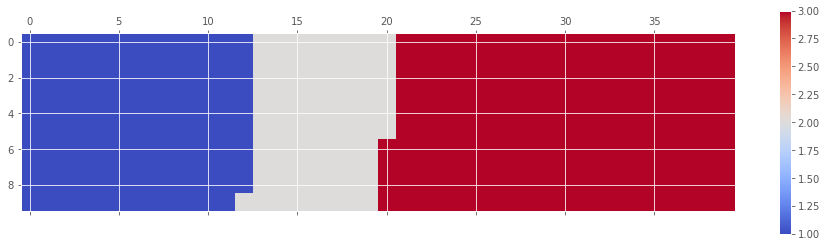

In [29]:
# instantiate a new figure object
fig = plt.figure()

# use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap=colormap)
plt.colorbar()
plt.show()

**Step 6.** Prettify the chart.


<Figure size 432x288 with 0 Axes>

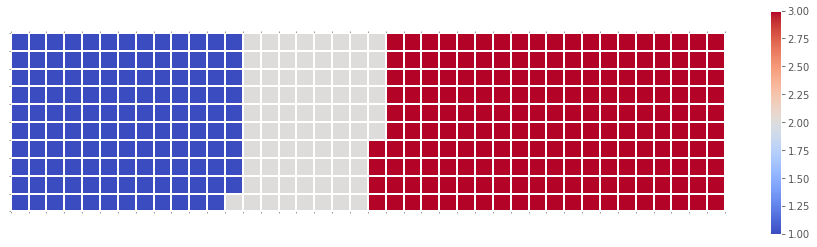

In [31]:
#initialize a new figure object
fig = plt.figure()

#use matshow to display the waffle chart
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

#get the axis 
ax = plt.gca()

#set minor ticks 
ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
ax.set_yticks(np.arange(-.5, (height), 1), minor = True)

#add the gridlines based on minor ticks
ax.grid(which = 'minor', color = 'w', linestyle = '-', linewidth = 2)

plt.xticks([])
plt.yticks([])
plt.show()


**Step 7.** Create a legend and add it to chart.


<function matplotlib.pyplot.show>

<Figure size 432x288 with 0 Axes>

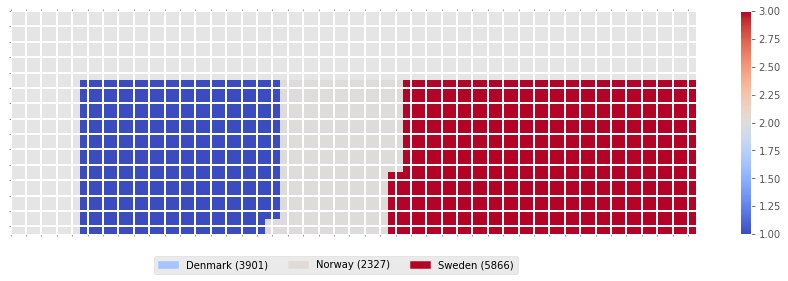

In [43]:

#instantiate a new figure object 
fig = plt.figure()

#use matshow to display the waffle chart 
colormap = plt.cm.coolwarm
plt.matshow(waffle_chart, cmap = colormap)
plt.colorbar()

#get the axis 
ax = plt.gca()

#set the minor ticks 
ax.set_xticks(np.arange(-5, (width), 1), minor = True)
ax.set_yticks(np.arange(-5, (height), 1), minor = True)

##add gridlines based on minor ticks 
ax.grid(which = 'minor', color = 'w', linestyle = '-', linewidth = 2)

plt.xticks([])
plt.yticks([])

#compute cumulative sum of individual categories to match color schemes between chart and legend
values_cumsum = np.cumsum(df['Total'])
total_values = values_cumsum[len(values_cumsum) - 1]

#create legend 
legend_handles = []
for i, category in enumerate(df.index.values):
  label_str = category + ' (' + str(df['Total'][i]) + ')'
  color_val = colormap(float(values_cumsum[i])/total_values)
  legend_handles.append(mpatches.Patch(color = color_val, label = label_str))

#add legend to chart 
plt.legend(handles=legend_handles,
           loc = 'lower center',
           ncol = len(df.index.values),
           bbox_to_anchor = (0., -0.2, 0.95, .1))
plt.show

And there you go! What a good looking *delicious* `waffle` chart, don't you think?

Now it would very inefficient to repeat these seven steps every time we wish to create a `waffle` chart. So let's combine all seven steps into one function called *create_waffle_chart*. This function would take the following parameters as input:

> 1.  **categories**: Unique categories or classes in dataframe.
> 2.  **values**: Values corresponding to categories or classes.
> 3.  **height**: Defined height of waffle chart.
> 4.  **width**: Defined width of waffle chart.
> 5.  **colormap**: Colormap class
> 6.  **value_sign**: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. **value_sign** has a default value of empty string.


In [44]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign = ''):

  #compute the proportion of each category with respect to the total
  total_values = sum(values)
  category_proportions = [(float(value) / total_values) for value in values]

  #compute the total number of tiles 
  total_num_tiles = width * height
  print('Total number of tiles is', total_num_tiles)

  #compute the number of tiles for each category
  tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

  #print out number of tiles for each category 
  for i, tiles in enumerate(tiles_per_category):
    print(df.index.values[i] + ': ' + str(tiles))
  
  #initialize the waffle chart as an empty matrix
  waffle_chart = np.zeros((height, width))

  #define indicies to loop through waffle chart
  category_index = 0
  tile_index = 0

  #populate the waffle chart  as an empty matrix 
  for col in range(width):
    for row in range(height):
      tile_index +=1

      #if the number of tiles popupated for the current category is qual to its corresponding allocated tiles
      if tile_index > sum(tiles_per_category[0:category_index]):
        category_index +=1

      # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
    
  # instantiate a new figure object
  fig = plt.figure()

  #use matshow to display the waffle chart 
  colormap = plt.cmcoolwarm
  plt.matshow(waffle_chart, cmap = colormap)
  plt.colorbar()

  #get the axis
  ax = plt.gca()

  #set the minor ticks 
  ax.set_xticks(np.arange(-.5, (width), 1), minor = True)
  ax.set_yticks(np.arange(-.5, (height), 1), minor = True) 

  #add gridlines based on minor ticks
  ax.grid(which = 'minor', color = 'w', linestyle = '-', linewidth = 2)

  plt.xticks([])
  plt.yticks([])

  #compite cumulative sum of individual categories to match color schemes between chart and legend 
  values_cumsum = np.cumsum(values)
  total_values = values_cumsum[len(values_cumsum) -1]
  
